<a href="https://colab.research.google.com/github/WilliamNewbo/Bayern-1-1p-Chelsea-Analysis/blob/main/An_Introduction_to_Football_Analytics_How_to_make_a_shot_map_for_Football_Data_Analysis_using%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to Football Analytics: How to make a shot map for Football Data Analysis using Python

## Imports

In [1]:
!pip install mplsoccer
!pip install statsbombpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 KB 6.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch

## The Data

In [3]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-12-01T11:42:34.874323,2021-06-13T16:17:31.694,None,2022-12-01T11:42:34.874323
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [4]:
CL_201112 = sb.competitions().loc[(sb.competitions()['competition_id'] == 16) & (sb.competitions()['season_name'] == '2011/2012')]
CL_201112

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [5]:
matches = sb.matches(competition_id=16, season_id=23)
matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18237,2012-05-19,20:45:00.000,Europe - Champions League,2011/2012,Bayern Munich,Chelsea,1,1,available,...,2021-06-13T16:17:31.694,1,Final,Allianz Arena,Pedro Proença,Josef Heynckes,Roberto Di Matteo,1.0.3,None,None


In [6]:
events = sb.events(18237)

In [7]:
# Split existing location columns into x and y (and z if appropriate) components

# location
events[['location_x', 'location_y']] = events['location'].apply(pd.Series)

# pass destination location
events[['pass_end_location_x', 'pass_end_location_y']] = events['pass_end_location'].apply(pd.Series)

# shot destination location
events[['shot_end_location_x', 'shot_end_location_y', 'shot_end_location_z']] = events['shot_end_location'].apply(pd.Series)

In [8]:
events_df = events[[
    'index', 'id', 'duration', 'match_id', 'minute', 'pass_angle',
    'pass_height', 'pass_height', 'pass_length', 'pass_outcome',
    'pass_recipient', 'pass_shot_assist', 'pass_goal_assist', 'period', 'play_pattern', 'player',
    'player_id', 'position', 'possession', 'possession_team', 
    'possession_team_id', 'shot_type', 'shot_outcome', 'team', 'timestamp', 
    'type', 'location_x', 'location_y', 'pass_end_location_x',
    'pass_end_location_y', 'shot_end_location_x', 'shot_end_location_y', 
    'shot_end_location_z', 'shot_statsbomb_xg'
]]

In [9]:
shots = events_df.loc[events_df['type'] == 'Shot'].set_index('id', 'match')

<ipython-input-9-463a68fab575>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  shots = events_df.loc[events_df['type'] == 'Shot'].set_index('id', 'match')


In [10]:
# Chelsea shots
chelsea_shots = shots.loc[shots['team'] == 'Chelsea']

# Non-penalty shootout chelsea shots
np_chelsea_shots = chelsea_shots[:-5]

In [11]:
# total shots
number_of_shots = len(np_chelsea_shots)

# total shots on target
on_target_shots = np_chelsea_shots.loc[(np_chelsea_shots['shot_outcome'] == 'Goal') |
                                       (np_chelsea_shots['shot_outcome'] == 'Saved')]

number_of_on_target_shots = len(on_target_shots)                     

# total xG
xG_list = []
for index, row in np_chelsea_shots.iterrows():
  xG_list.append(row['shot_statsbomb_xg'])
xG = sum(xG_list)

# xG per shot
xG_per_shot = xG/number_of_shots

## Draw A Pitch

### Horizontal Full-Length Pitch

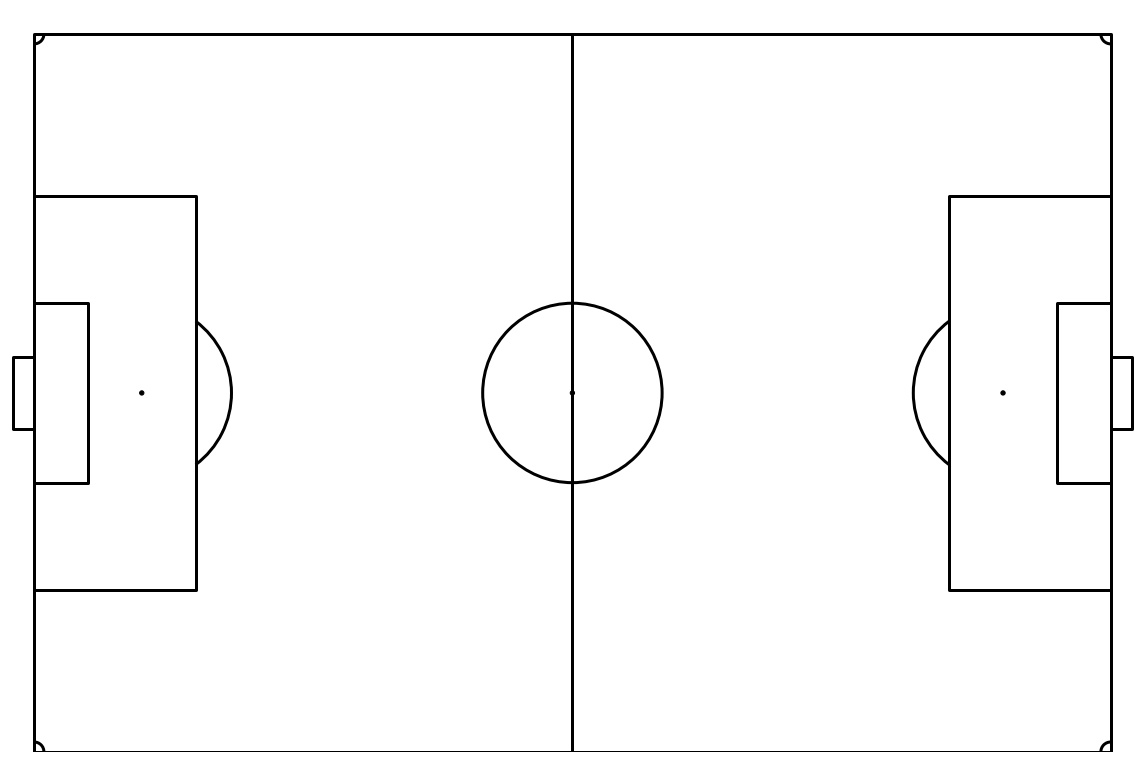

In [12]:
pitch = Pitch(corner_arcs=True, goal_type='box', 
                      pad_bottom=0, pad_top=3, pad_left=3, pad_right=3,
                      pitch_color = 'white', line_color='black', linewidth=3)
fig, ax = pitch.draw(figsize=(16, 16))

plt.show()

### Vertical Full-Length Pitch

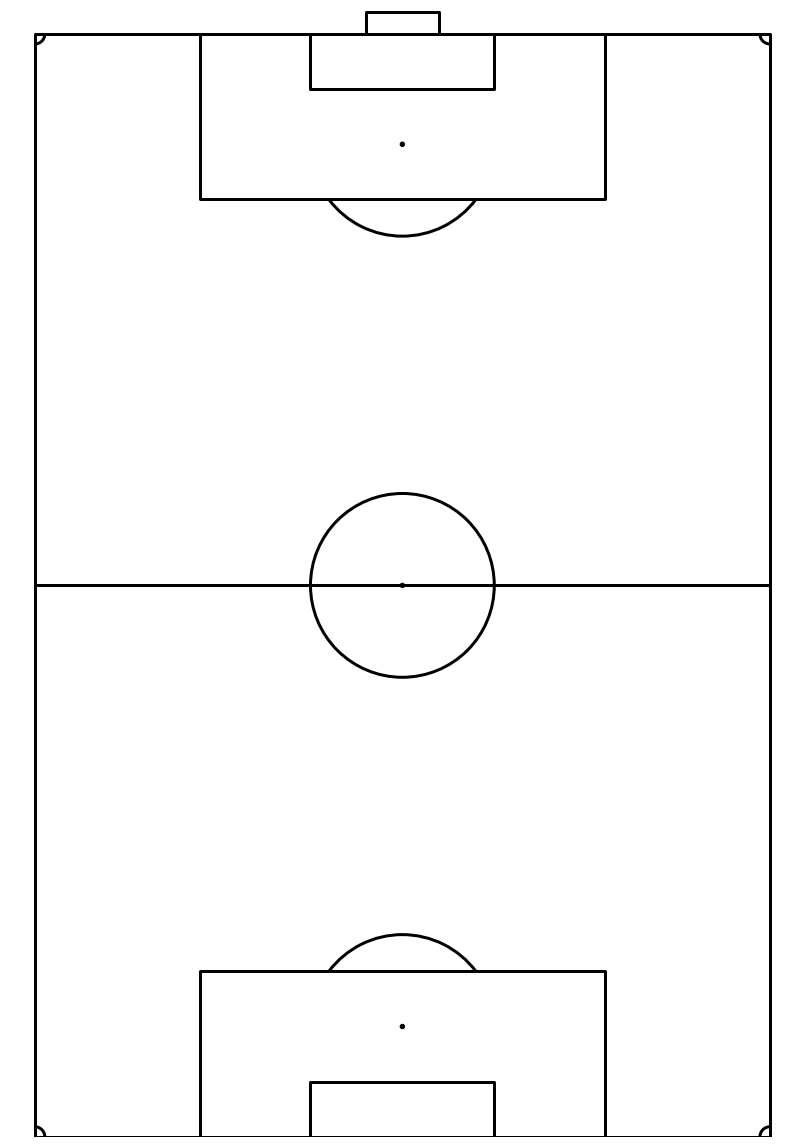

In [13]:
pitch = VerticalPitch(corner_arcs=True, goal_type='box', 
                      pad_bottom=0, pad_top=3, pad_left=3, pad_right=3,
                      pitch_color = 'white', line_color='black', linewidth=3)
fig, ax = pitch.draw(figsize=(16, 16))

plt.show()

### Vertical Half-Length Pitch

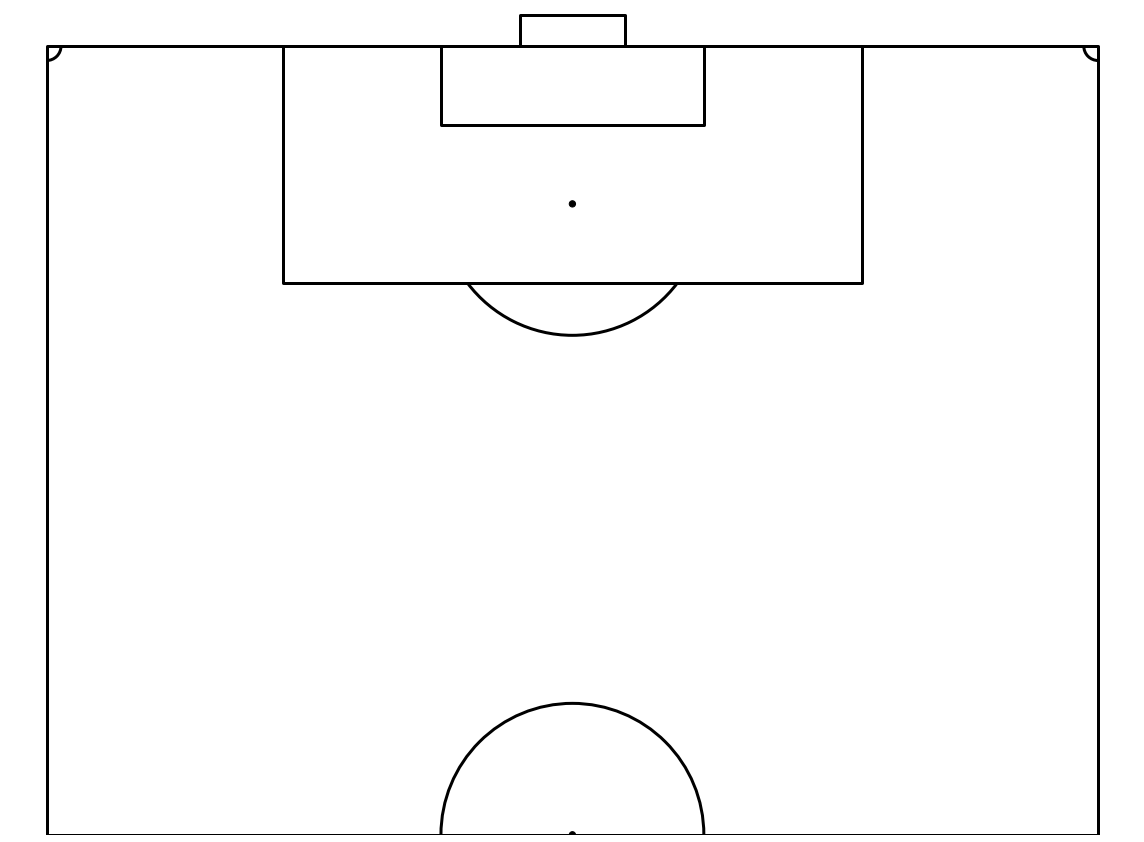

In [14]:
pitch = VerticalPitch(half=True, corner_arcs=True, goal_type='box', 
                      pad_bottom=0, pad_top=3, pad_left=3, pad_right=3,
                      pitch_color = 'white', line_color='black', linewidth=3)
fig, ax = pitch.draw(figsize=(16, 16))

plt.show()

## Create A Shot Map Visualisation

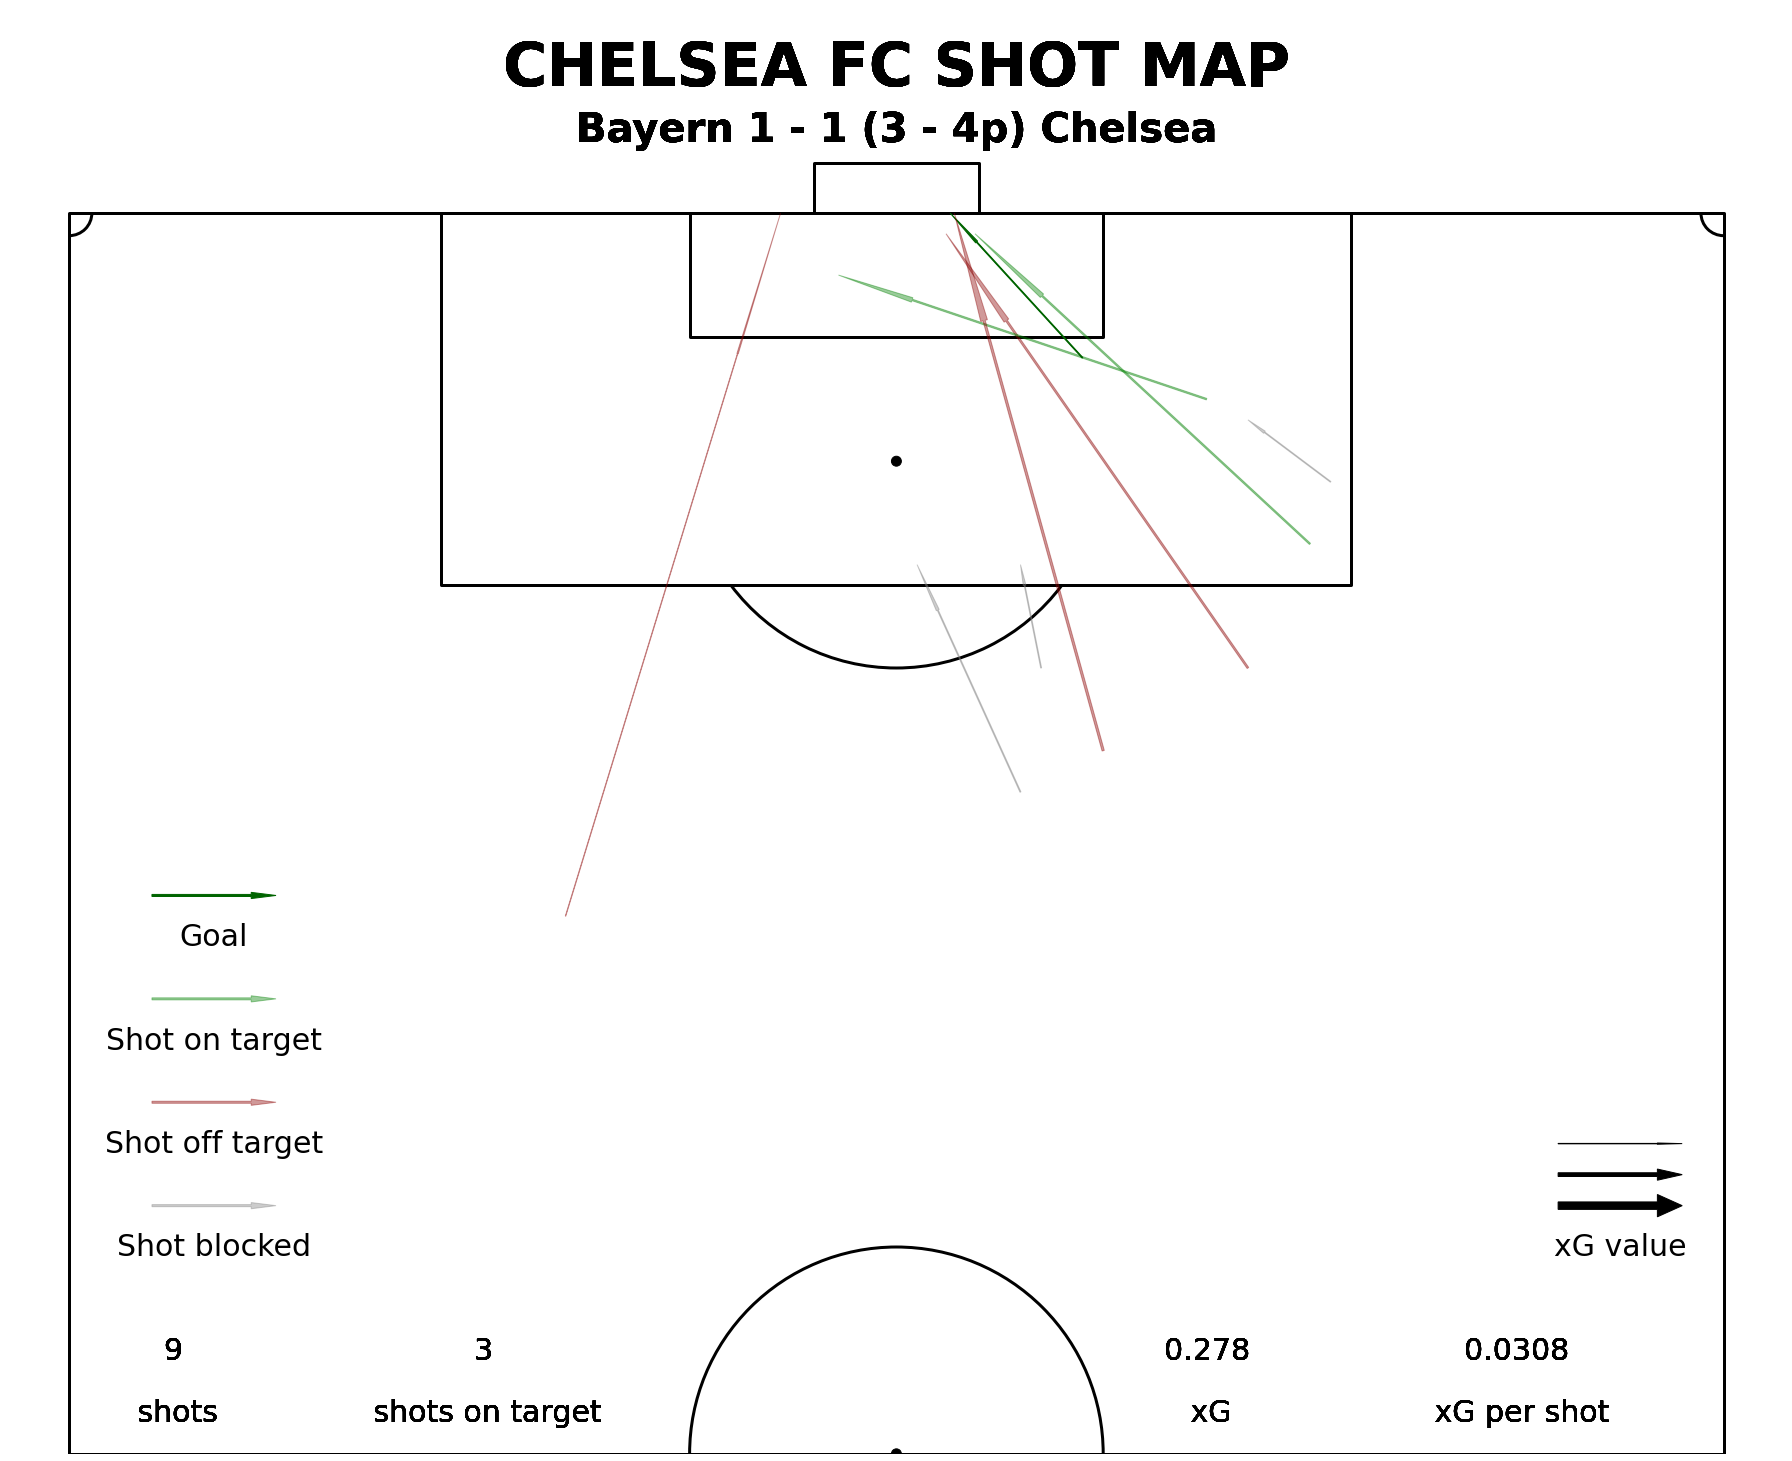

In [15]:
# Define colours
pitch_colour = 'white'
line_colour = 'black'
goal_colour = 'darkgreen'
shot_on_colour = 'green'
shot_off_colour = 'darkred'
shot_block_colour = 'grey'
text_colour = '#000000'

# Draw the pitch
pitch = VerticalPitch(half=True, corner_arcs=True, goal_type='box', 
                      pad_bottom=0, pad_top=10, pad_left=3, pad_right=3,
                      pitch_color=pitch_colour, line_color=line_colour, linewidth=3)
fig, ax = pitch.draw(figsize=(25, 25))

# Iterate through the non-penalty shoot-out shots and set x and y as the corresponding start location 
# of each shot and dx and dy as the corresponding end location of each shot.
# set the arrow width to be the xG of the shot * 10
for index, row in np_chelsea_shots.iterrows():
  x = row['location_y']
  y = row['location_x']
  dx = row['shot_end_location_y']
  dy = row['shot_end_location_x']
  arrow_width = row['shot_statsbomb_xg'] * 10

  # Plot a shot arrow with width relating to the shots's xG for each shot 
  # The colour of the arrow depends on the outcome of the shot
  if row['shot_outcome'] == 'Goal':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=goal_colour)

  elif row['shot_outcome'] == 'Saved':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_on_colour, alpha=0.4)

  elif row['shot_outcome'] == 'Off T':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_off_colour, alpha=0.4)

  else:
     shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_block_colour, alpha=0.4)

  # Add arrow to the pitch
  ax.add_patch(shot_arrow)

  # Add title text
  pitch.annotate('CHELSEA FC SHOT MAP', xy=(127, 40), c=text_colour, size=60, va='center', ha='center', weight='bold', ax=ax)
  pitch.annotate('Bayern 1 - 1 (3 - 4p) Chelsea', xy=(124, 40), c=text_colour, size=40, va='center', ha='center', weight='bold', ax=ax)

  # Add numerical stats
  pitch.annotate(str(number_of_shots), xy=(65, 5), c=text_colour, size=30, va='center', ha='center', ax=ax)
  pitch.annotate(' shots', xy=(62, 5), c=text_colour, size=30, va='center', ha='center', ax=ax)

  pitch.annotate(str(number_of_on_target_shots), xy=(65, 20), c=text_colour, size=30, va='center', ha='center', ax=ax)
  pitch.annotate(' shots on target', xy=(62, 20), c=text_colour, size=30, va='center', ha='center', ax=ax)

  pitch.annotate('%.3g' % (xG), xy=(65, 55), c=text_colour, size=30, va='center', ha='center', ax=ax)
  pitch.annotate(' xG', xy=(62, 55), c=text_colour, size=30, va='center', ha='center', ax=ax)

  pitch.annotate('%.3g' % (xG_per_shot), xy=(65, 70), c=text_colour, size=30, va='center', ha='center', ax=ax)
  pitch.annotate(' xG per shot', xy=(62, 70), c=text_colour, size=30, va='center', ha='center', ax=ax)

# provide a legend to explain the meaning of each coloured arrow
goal_arrow = plt.Arrow(4, 87, 6, 0, width=0.5, color=goal_colour)
shot_on_arrow = plt.Arrow(4, 82, 6, 0, width=0.5, color=shot_on_colour, alpha=0.4)
shot_off_arrow = plt.Arrow(4, 77, 6, 0, width=0.5, color=shot_off_colour, alpha=0.4)
shot_block_arrow = plt.Arrow(4,72, 6, 0, width=0.5, color=shot_block_colour, alpha=0.4)
ax.add_patch(goal_arrow)
ax.add_patch(shot_on_arrow)
ax.add_patch(shot_off_arrow)
ax.add_patch(shot_block_arrow)

pitch.annotate('Goal', xy=(85, 7), c=text_colour, size=30, va='center', ha='center', ax=ax)
pitch.annotate('Shot on target', xy=(80, 7), c=text_colour, size=30, va='center', ha='center', ax=ax)
pitch.annotate('Shot off target', xy=(75, 7), c=text_colour, size=30, va='center', ha='center', ax=ax)
pitch.annotate('Shot blocked', xy=(70, 7), c=text_colour, size=30, va='center', ha='center', ax=ax)

# provide legend to explain the meaning of arrows with different widths. 
low_xG_arrow = plt.Arrow(72, 75, 6, 0, width=0.1, color=text_colour)
medium_xG_arrow = plt.Arrow(72, 73.5, 6, 0, width=0.9, color=text_colour)
high_xG_arrow = plt.Arrow(72, 72, 6, 0, width=1.8, color=text_colour)
ax.add_patch(low_xG_arrow)
ax.add_patch(medium_xG_arrow)
ax.add_patch(high_xG_arrow)

pitch.annotate('xG value', xy=(70, 75), c=text_colour, size=30, va='center', ha='center', ax=ax)

plt.show()

### Add Custom Font

In [16]:
import matplotlib.font_manager as font_manager

my_font = 'ComingSoon-Regular.ttf'

font_title = font_manager.FontProperties(fname=my_font, size= 60, weight='bold')
font_score = font_manager.FontProperties(fname=my_font, size= 32, weight='bold')
font_logo = font_manager.FontProperties(fname=my_font, size= 56, weight='bold')
font_info_text = font_manager.FontProperties(fname=my_font, size= 40)
font_info = font_manager.FontProperties(fname=my_font, size= 48)
font_legend = font_manager.FontProperties(fname=my_font, size= 28)

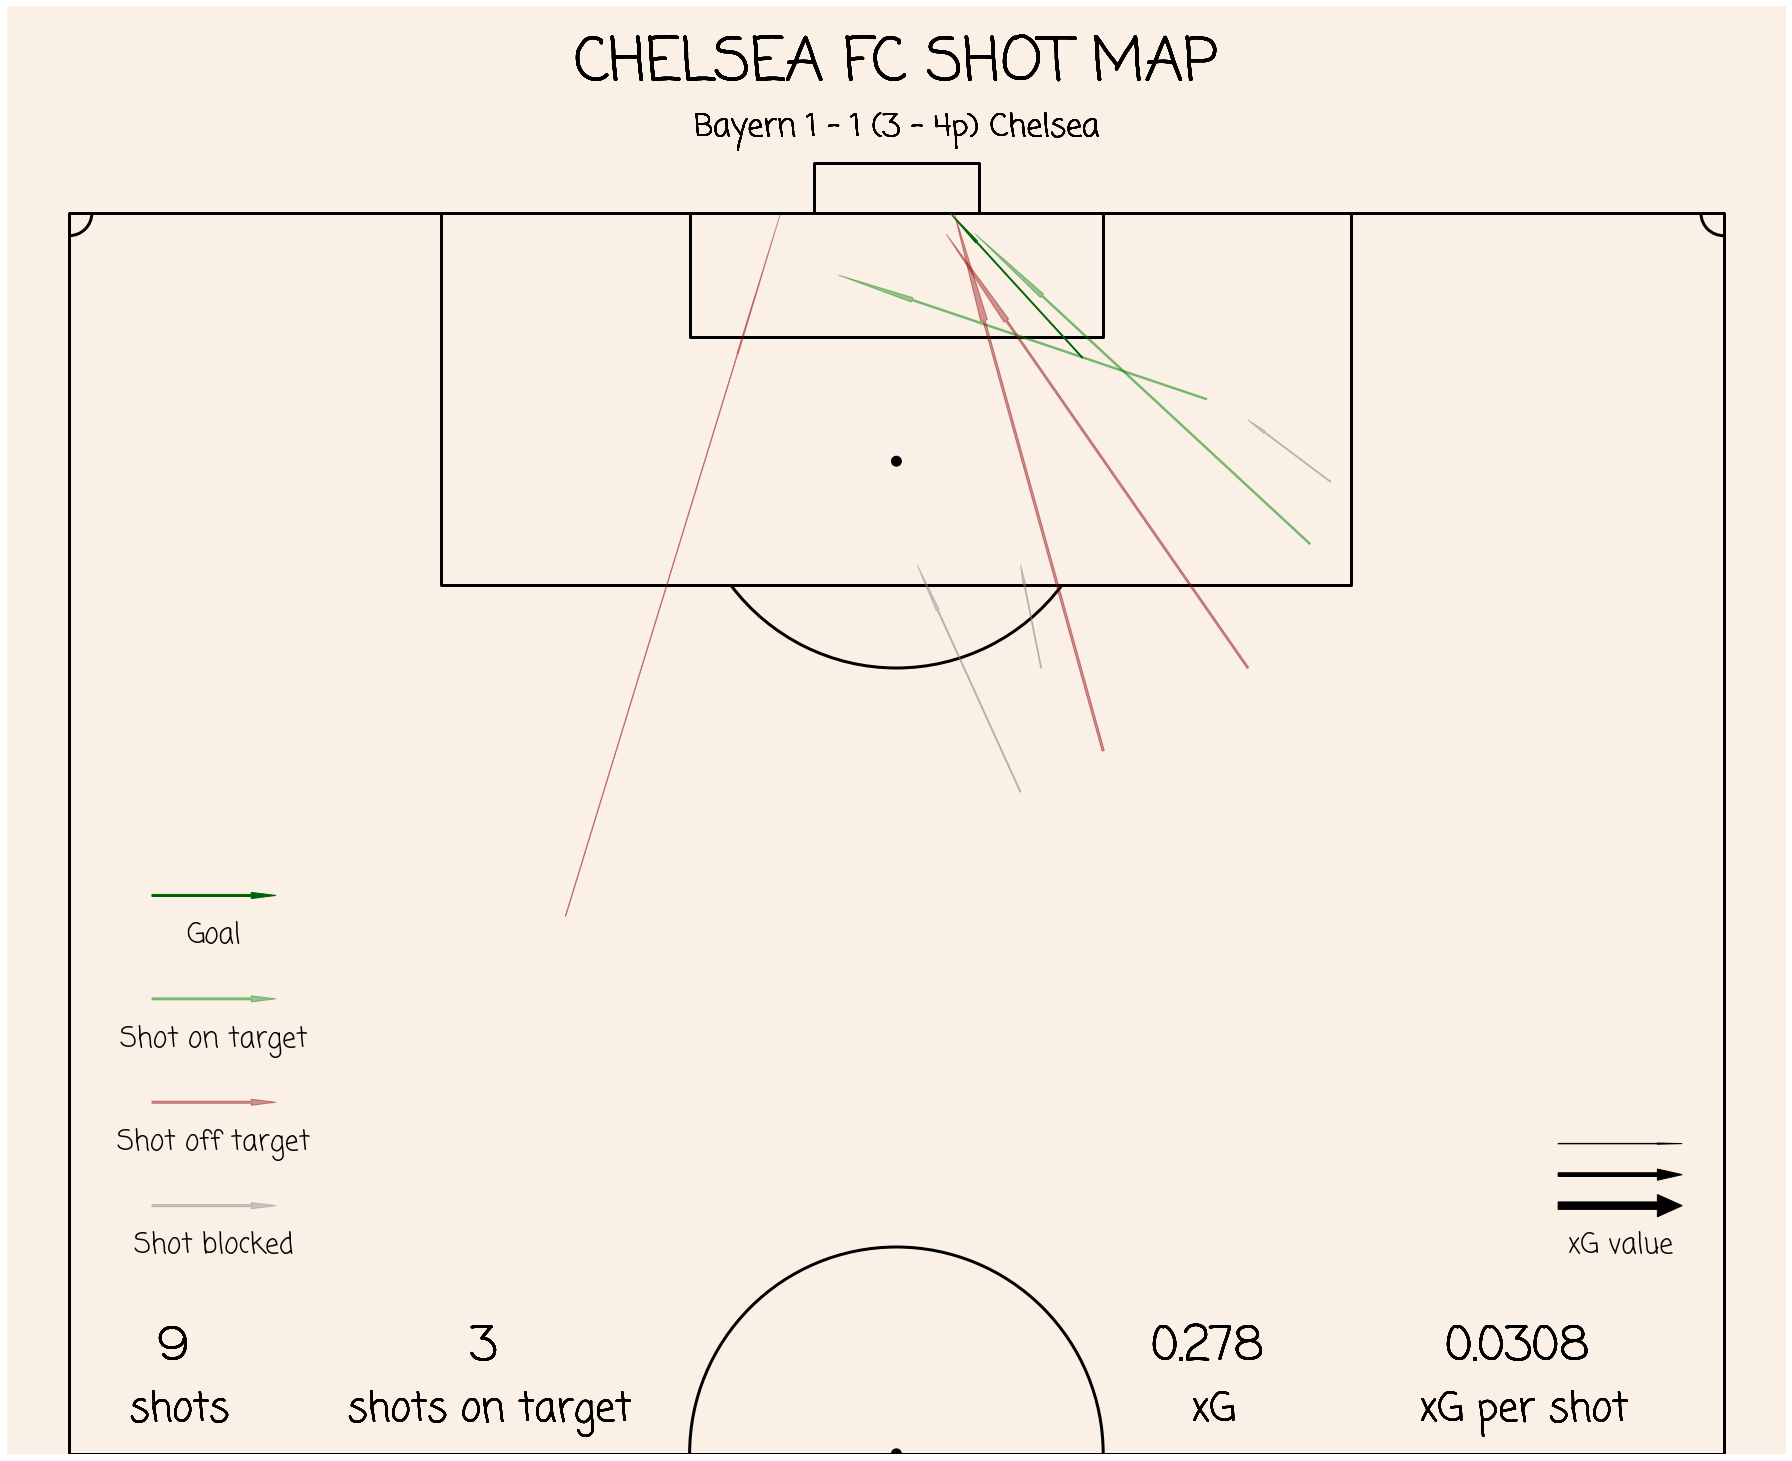

In [17]:
# Define colours
pitch_colour = '#FAF0E6'
line_colour = 'black'
goal_colour = 'darkgreen'
shot_on_colour = 'green'
shot_off_colour = 'darkred'
shot_block_colour = 'grey'
text_colour = 'black'

# Draw the pitch
pitch = VerticalPitch(half=True, corner_arcs=True, goal_type='box', 
                      pad_bottom=0, pad_top=10, pad_left=3, pad_right=3,
                      pitch_color=pitch_colour, line_color=line_colour, linewidth=3)
fig, ax = pitch.draw(figsize=(25, 25))

# Iterate through the non-penalty shoot-out shots and set x and y as the corresponding start location 
# of each shot and dx and dy as the corresponding end location of each shot.
# set the arrow width to be the xG of the shot * 10
for index, row in np_chelsea_shots.iterrows():
  x = row['location_y']
  y = row['location_x']
  dx = row['shot_end_location_y']
  dy = row['shot_end_location_x']
  arrow_width = row['shot_statsbomb_xg'] * 10

  # Plot a shot arrow with width relating to the shots's xG for each shot 
  # The colour of the arrow depends on the outcome of the shot
  if row['shot_outcome'] == 'Goal':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=goal_colour)

  elif row['shot_outcome'] == 'Saved':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_on_colour, alpha=0.4)

  elif row['shot_outcome'] == 'Off T':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_off_colour, alpha=0.4)

  else:
     shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_block_colour, alpha=0.4)

  # Add arrow to the pitch
  ax.add_patch(shot_arrow)

  # Add title text
  pitch.annotate('CHELSEA FC SHOT MAP', xy=(127, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_title)
  pitch.annotate('Bayern 1 - 1 (3 - 4p) Chelsea', xy=(124, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_score)

  # Add numerical stats
  pitch.annotate(str(number_of_shots), xy=(65, 5), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' shots', xy=(62, 5), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate(str(number_of_on_target_shots), xy=(65, 20), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_info)
  pitch.annotate(' shots on target', xy=(62, 20), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_info_text)

  pitch.annotate('%.3g' % (xG), xy=(65, 55), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' xG', xy=(62, 55), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate('%.3g' % (xG_per_shot), xy=(65, 70), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' xG per shot', xy=(62, 70), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

# provide a legend to explain the meaning of each coloured arrow
goal_arrow = plt.Arrow(4, 87, 6, 0, width=0.5, color=goal_colour)
shot_on_arrow = plt.Arrow(4, 82, 6, 0, width=0.5, color=shot_on_colour, alpha=0.4)
shot_off_arrow = plt.Arrow(4, 77, 6, 0, width=0.5, color=shot_off_colour, alpha=0.4)
shot_block_arrow = plt.Arrow(4,72, 6, 0, width=0.5, color=shot_block_colour, alpha=0.4)
ax.add_patch(goal_arrow)
ax.add_patch(shot_on_arrow)
ax.add_patch(shot_off_arrow)
ax.add_patch(shot_block_arrow)

pitch.annotate('Goal', xy=(85, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot on target', xy=(80, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot off target', xy=(75, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot blocked', xy=(70, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)

# provide legend to explain the meaning of arrows with different widths. 
low_xG_arrow = plt.Arrow(72, 75, 6, 0, width=0.1, color=text_colour)
medium_xG_arrow = plt.Arrow(72, 73.5, 6, 0, width=0.9, color=text_colour)
high_xG_arrow = plt.Arrow(72, 72, 6, 0, width=1.8, color=text_colour)
ax.add_patch(low_xG_arrow)
ax.add_patch(medium_xG_arrow)
ax.add_patch(high_xG_arrow)

pitch.annotate('xG value', xy=(70, 75), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)

plt.show()

## FC Bayern Munich Shot Map

In [18]:
# Bayern Munich shots
bayern_munich_shots = shots.loc[shots['team'] == 'Bayern Munich']

# Non-penalty shootout Bayern Munich shots
np_bayern_munich_shots = bayern_munich_shots[:-5]

In [19]:
# total shots
number_of_shots = len(np_bayern_munich_shots)

# total shots on target
on_target_shots = np_bayern_munich_shots.loc[(np_bayern_munich_shots['shot_outcome'] == 'Goal') |
                                       (np_bayern_munich_shots['shot_outcome'] == 'Saved')]

number_of_on_target_shots = len(on_target_shots)                     

# total xG
xG_list = []
for index, row in np_bayern_munich_shots.iterrows():
  xG_list.append(row['shot_statsbomb_xg'])
xG = sum(xG_list)

# xG per shot
xG_per_shot = xG/number_of_shots

In [20]:
import matplotlib.font_manager as font_manager

my_font = 'BlackOpsOne-Regular.ttf'

font_title = font_manager.FontProperties(fname=my_font, size= 90, weight='bold')
font_score = font_manager.FontProperties(fname=my_font, size= 70, weight='bold')
font_info_text = font_manager.FontProperties(fname=my_font, size= 56)
font_info = font_manager.FontProperties(fname=my_font, size= 60)
font_legend = font_manager.FontProperties(fname=my_font, size= 34)

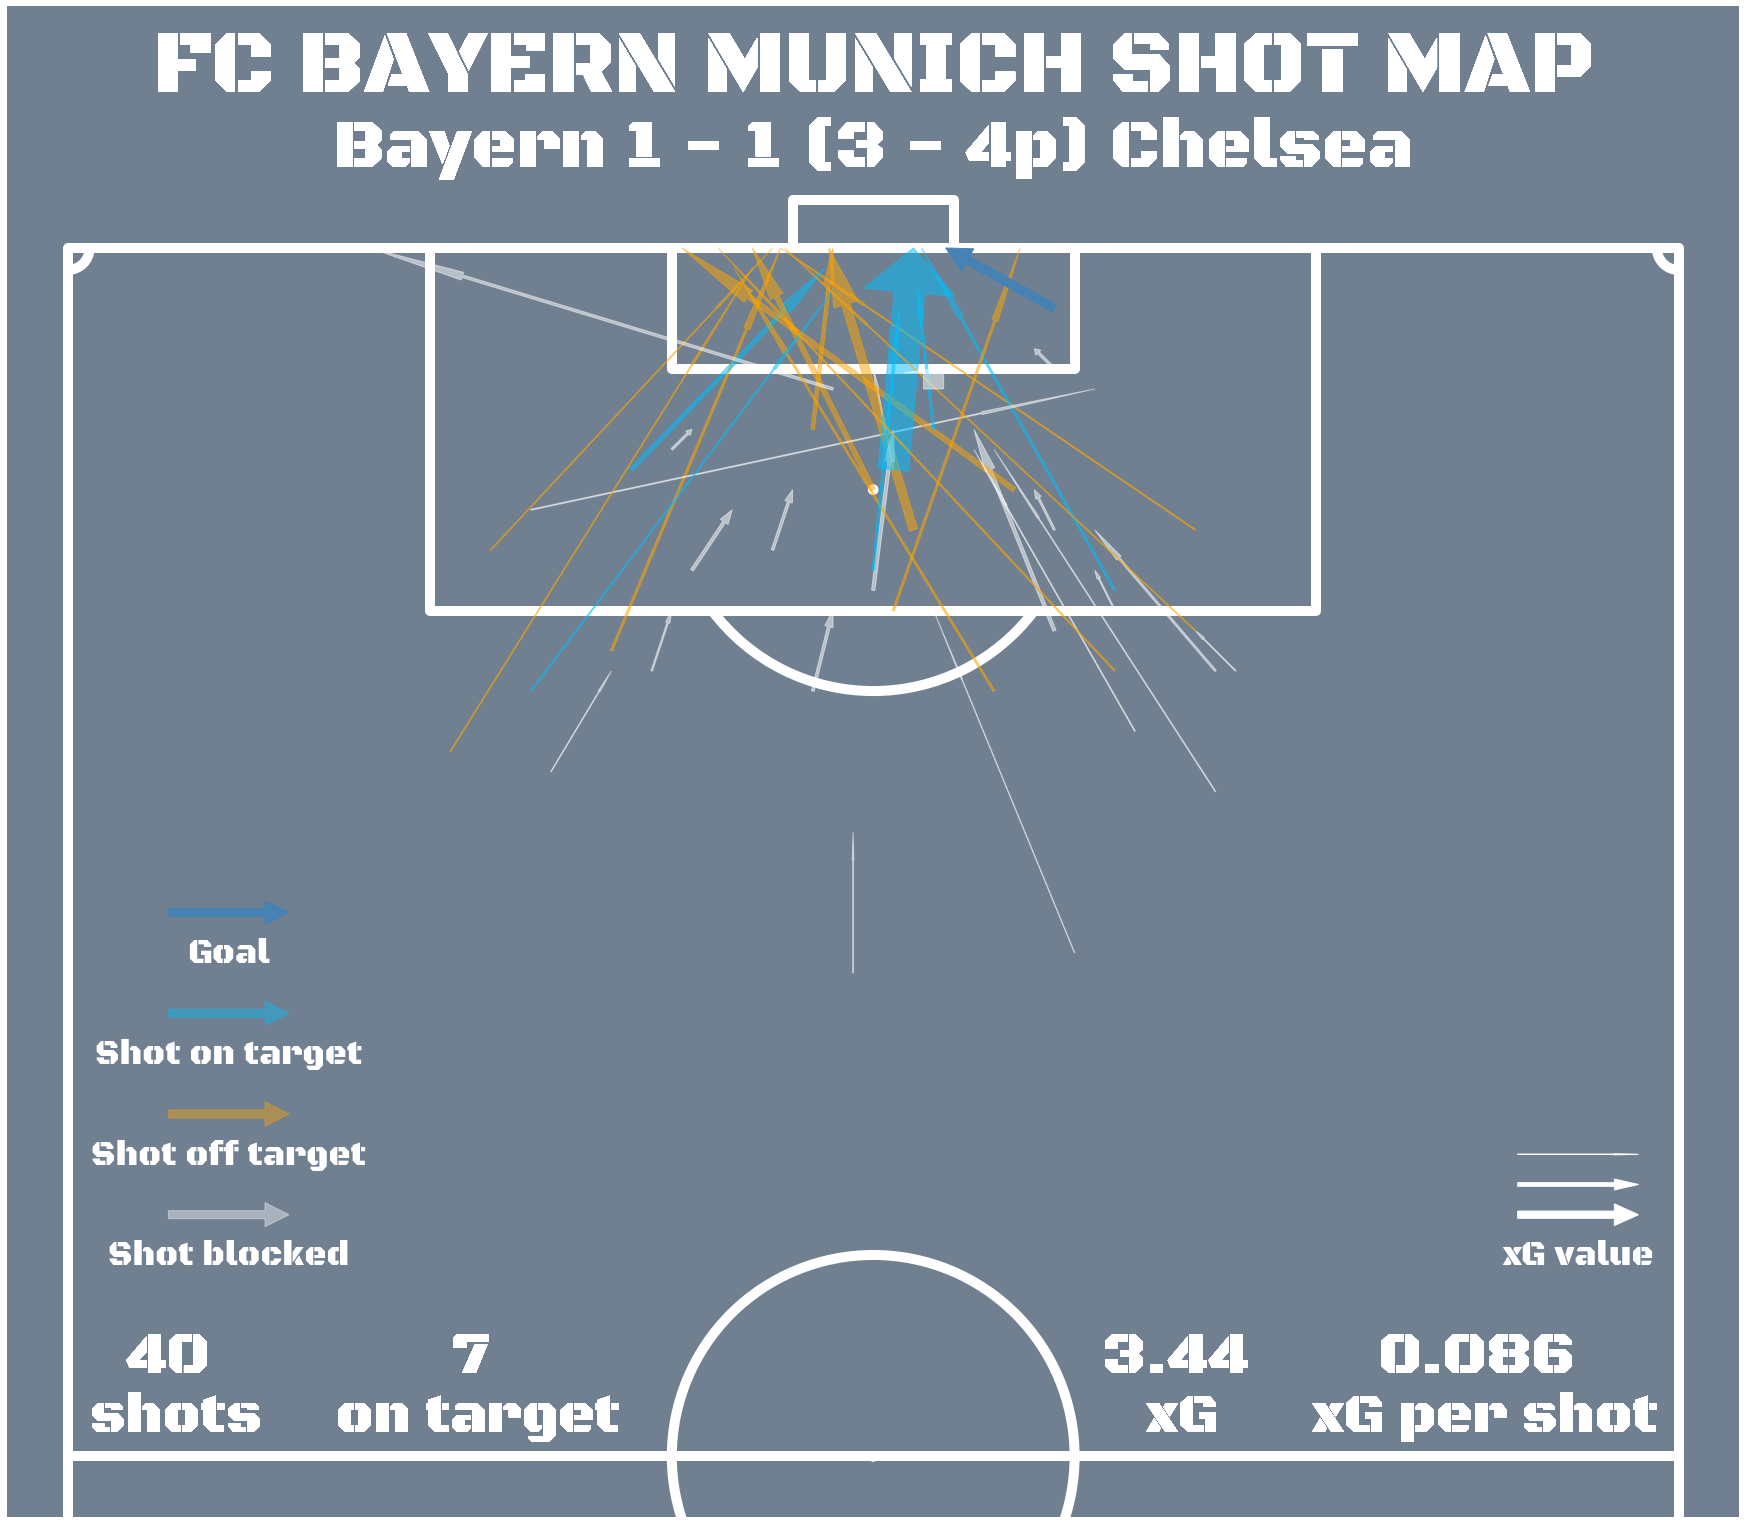

In [21]:
# Define colours
pitch_colour = '#708090'
line_colour = 'white'
goal_colour = '#4682B4'
shot_on_colour = '#00BFFF'
shot_off_colour = 'orange'
shot_block_colour = 'white'
text_colour = 'white'

# Draw the pitch
pitch = VerticalPitch(half=True, corner_arcs=True, goal_type='box',
                      pad_bottom=3, pad_top=12, pad_left=3, pad_right=3,
                      pitch_color=pitch_colour, line_color=line_colour, linewidth=10)
fig, ax = pitch.draw(figsize=(25, 25))

# Iterate through the non-penalty shoot-out shots and set x and y as the corresponding start location 
# of each shot and dx and dy as the corresponding end location of each shot.
# set the arrow width to be the xG of the shot * 10
for index, row in np_bayern_munich_shots.iterrows():
  x = row['location_y']
  y = row['location_x']
  dx = row['shot_end_location_y']
  dy = row['shot_end_location_x']
  arrow_width = row['shot_statsbomb_xg'] * 10

  # Plot a shot arrow with width relating to the shots's xG for each shot 
  # The colour of the arrow depends on the outcome of the shot
  if row['shot_outcome'] == 'Goal':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=goal_colour)

  elif row['shot_outcome'] == 'Saved':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_on_colour, alpha=0.5)

  elif row['shot_outcome'] == 'Off T':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_off_colour, alpha=0.5)

  else:
     shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_block_colour, alpha=0.5)

  # Add arrow to the pitch
  ax.add_patch(shot_arrow)

  # Add title text
  pitch.annotate('FC BAYERN MUNICH SHOT MAP', xy=(129, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_title)
  pitch.annotate('Bayern 1 - 1 (3 - 4p) Chelsea', xy=(125, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_score)

  # Add numerical stats
  pitch.annotate(str(number_of_shots), xy=(65, 5), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' shots', xy=(62, 5), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate(str(number_of_on_target_shots), xy=(65, 20), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_info)
  pitch.annotate(' on target', xy=(62, 20), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_info_text)

  pitch.annotate('%.3g' % (xG), xy=(65, 55), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' xG', xy=(62, 55), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate('%.3g' % (xG_per_shot), xy=(65, 70), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' xG per shot', xy=(62, 70), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

# provide a legend to explain the meaning of each coloured arrow
goal_arrow = plt.Arrow(5, 87, 6, 0, width=2, color=goal_colour)
shot_on_arrow = plt.Arrow(5, 82, 6, 0, width=2, color=shot_on_colour, alpha=0.4)
shot_off_arrow = plt.Arrow(5, 77, 6, 0, width=2, color=shot_off_colour, alpha=0.4)
shot_block_arrow = plt.Arrow(5,72, 6, 0, width=2, color=shot_block_colour, alpha=0.4)
ax.add_patch(goal_arrow)
ax.add_patch(shot_on_arrow)
ax.add_patch(shot_off_arrow)
ax.add_patch(shot_block_arrow)

pitch.annotate('Goal', xy=(85, 8), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot on target', xy=(80, 8), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot off target', xy=(75, 8), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot blocked', xy=(70, 8), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)

# provide legend to explain the meaning of arrows with different widths. 
low_xG_arrow = plt.Arrow(72, 75, 6, 0, width=0.1, color=text_colour)
medium_xG_arrow = plt.Arrow(72, 73.5, 6, 0, width=0.9, color=text_colour)
high_xG_arrow = plt.Arrow(72, 72, 6, 0, width=1.8, color=text_colour)
ax.add_patch(low_xG_arrow)
ax.add_patch(medium_xG_arrow)
ax.add_patch(high_xG_arrow)

pitch.annotate('xG value', xy=(70, 75), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)

plt.show()